In [22]:
import pandas as pd
from ranking_scores import puntos_ranking
dataset = pd.read_csv('atp_matches_2023.csv')
dataset_r = pd.read_csv('atp_rankings_20s.csv')
dataset = puntos_ranking(dataset, dataset_r, 2023)

In [23]:
dataset_r.head()

,ranking_date,rank,player,points,year_month
0,2020-01-06,1,104745,9985,2020-01
1,2020-01-06,2,104925,9055,2020-01
2,2020-01-06,3,103819,6590,2020-01
3,2020-01-06,4,106233,5825,2020-01
4,2020-01-06,5,106421,5705,2020-01


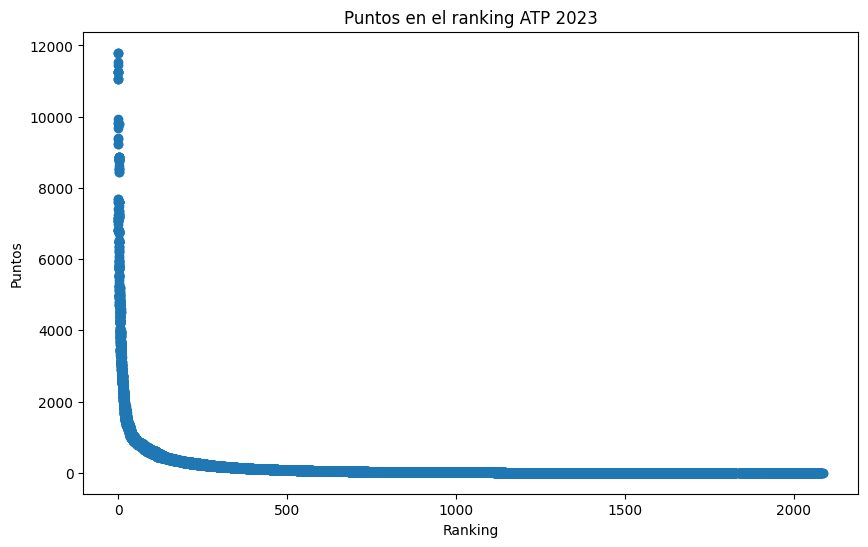

In [24]:
import matplotlib.pyplot as plt

# Convertir la columna 'year_month' a string
dataset_r['year_month'] = dataset_r['year_month'].astype(str)

# Filtrar los datos para el año 2023
dataset_2023 = dataset_r[dataset_r['year_month'].str.contains('2023')]

# Crear un gráfico de dispersión de los puntos en función del ranking
plt.figure(figsize=(10,6))
plt.scatter(dataset_2023['rank'], dataset_2023['points'])
plt.title('Puntos en el ranking ATP 2023')
plt.xlabel('Ranking')
plt.ylabel('Puntos')
plt.show()

In [25]:
dataset.head()

,winner_id,loser_id,surface,winner_points,loser_points
0,126203,126610,Hard,3355,2375
1,126207,207518,Hard,2000,1865
2,126203,128034,Hard,3355,2905
3,126207,200390,Hard,2000,220
4,126774,126610,Hard,5550,2375


Escalar los datos de puntos en el ranking entre 0.5 y 1 siguiendo una función logarítmica

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Crear el escalador, ajustando el rango entre 0.5 y 1
scaler = MinMaxScaler(feature_range=(0.5, 1))

# Ajustar y transformar las columnas 'winner_rank_points' y 'loser_rank_points'
dataset['winner_points'] = scaler.fit_transform(dataset[['winner_points']])
dataset['loser_points'] = scaler.fit_transform(dataset[['loser_points']])